In [58]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from folium import plugins
import json
import ipywidgets

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path=r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data'

In [4]:
# Import the “df_sub.pkl” file into Jupyter as df_sub

df_sub = pd.read_pickle(os.path.join(path, 'Prepared Data', 'df_sub.pkl'))

In [5]:
# Import ".json" file for the U.S. as geo_d

geo_d = r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json'

In [6]:
# View the JSON file contents

f = open(r'/Users/Dimitris/Desktop/CF Data Analytics/Data Immersion/Achievement 6/02 Data/Original Data/custom.geo.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Costa Rica', 'sov_a3': 'CRI', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Costa Rica', 'adm0_a3': 'CRI', 'geou_dif': 0, 'geounit': 'Costa Rica', 'gu_a3': 'CRI', 'su_dif': 0, 'subunit': 'Costa Rica', 'su_a3': 'CRI', 'brk_diff': 0, 'name': 'Costa Rica', 'name_long': 'Costa Rica', 'brk_a3': 'CRI', 'brk_name': 'Costa Rica', 'brk_group': None, 'abbrev': 'C.R.', 'postal': 'CR', 'formal_en': 'Republic of Costa Rica', 'formal_fr': None, 'name_ciawf': 'Costa Rica', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Costa Rica', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 2, 'mapcolor9': 4, 'mapcolor13': 2, 'pop_est': 5047561, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 61801, 'gdp_year': 2019, 'economy': '5. Emerging region: G20', 'income_grp': '3. Upper middle income', 'fips_10': 'CS', 'iso_a2': 'CR', 'iso_a2_eh': 'CR', 'iso_a3': 'CRI', 'iso_a3

In [31]:
for i in geo_d['features']:
    i['id'] = i['properties']['bike_id']

TypeError: string indices must be integers

In [7]:
df_sub.shape

(12570179, 21)

In [8]:
df_sub.dtypes

trip_duration                     float64
start_time                 datetime64[ns]
stop_time                  datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
birth_year                        float64
gender                             object
age                               float64
age_group_loc                      object
trip_duration_range_loc            object
station_users                      object
day_of_week                        object
hour_of_day                         int64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7facb4e73700>,
 'caps': [<matplotlib.lines.Line2D at 0x7facb4e73b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7facb4e73520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fabb9c29550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fabb9c29820>],
 'means': []}

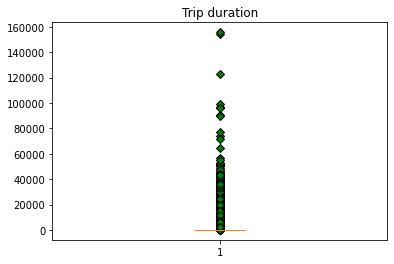

In [9]:
# df_sub trip_duration outliers

green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Trip duration')
ax3.boxplot(df_sub.trip_duration, flierprops=green_diamond)

In [10]:
# Change coordinate columns' data types to string

df_sub['start_station_latitude'] = df_sub['start_station_latitude'].astype(str)
df_sub['end_station_latitude'] = df_sub['end_station_latitude'].astype(str)
df_sub['start_station_longitude'] = df_sub['start_station_longitude'].astype(str)
df_sub['end_station_longitude'] = df_sub['end_station_longitude'].astype(str)

In [37]:
df_sub.dtypes

trip_duration                     float64
start_time                 datetime64[ns]
stop_time                  datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude             object
start_station_longitude            object
end_station_id                    float64
end_station_name                   object
end_station_latitude               object
end_station_longitude              object
bike_id                             int64
user_type                          object
birth_year                        float64
gender                             object
age                               float64
age_group_loc                      object
trip_duration_range_loc            object
station_users                      object
day_of_week                        object
hour_of_day                         int64
dtype: object

In [18]:
# For the purposes of my analysis I will keep all trips with a duration between 2 minutes and up to 2,900 mins (48.33 hours)
# I will treat the remaining trips as outliers or errors as trips outside these limits are not reasonable for a city rental service.


df_sub2 = df_sub[df_sub['trip_duration'] >= 2]
df_sub2 = df_sub[df_sub['trip_duration'] <= 2900] 

In [13]:
df_sub2

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,birth_year,gender,age,age_group_loc,trip_duration_range_loc,station_users,day_of_week,hour_of_day
0,11.333333,2017-01-01 00:00:21.000,2017-01-01 00:11:41.000,3226.0,W 82 St & Central Park West,40.78275,-73.97137,3165.0,Central Park West & W 72 St,40.77579376683666,...,25542,Subscriber,1965.0,F,52.0,Middle-aged,Short,Less busy,Sun.,0
4,10.350000,2017-01-01 00:01:25.000,2017-01-01 00:11:47.000,3143.0,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152.0,3 Ave & E 71 St,40.76873687,...,26819,Customer,NaN,N/A,NaN,NaN,Short,Less busy,Sun.,0
8,4.250000,2017-01-01 00:05:47.000,2017-01-01 00:10:02.000,430.0,York St & Jay St,40.7014851,-73.98656928,242.0,Carlton Ave & Flushing Ave,40.697787,...,25041,Subscriber,1989.0,M,28.0,Adult,Very short,Busy,Sun.,0
12,33.416667,2017-01-01 00:05:57.000,2017-01-01 00:39:23.000,524.0,W 43 St & 6 Ave,40.75527307,-73.98316936,3325.0,E 95 St & 3 Ave,40.7849032,...,17171,Subscriber,1992.0,M,25.0,Adult,Average,Busy,Sun.,0
16,14.983333,2017-01-01 00:09:20.000,2017-01-01 00:24:19.000,515.0,W 43 St & 10 Ave,40.76009437,-73.99461843,3428.0,8 Ave & W 16 St,40.740983,...,15597,Subscriber,1970.0,M,47.0,Middle-aged,Short,Busy,Sun.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955187,22.616667,2019-12-31 23:51:18.276,2020-01-01 00:13:56.184,2021.0,W 45 St & 8 Ave,40.75929124,-73.98859651,2021.0,W 45 St & 8 Ave,40.75929124,...,21526,Subscriber,1991.0,F,28.0,Adult,Average,Not busy,Tues.,23
955191,7.850000,2019-12-31 23:52:57.231,2020-01-01 00:00:48.247,3151.0,E 81 St & York Ave,40.7728384,-73.94989233,3362.0,Madison Ave & E 82 St,40.7781314,...,35174,Subscriber,1988.0,F,31.0,Adult,Short,Less busy,Tues.,23
955195,22.633333,2019-12-31 23:53:18.074,2020-01-01 00:15:56.948,380.0,W 4 St & 7 Ave S,40.73401143,-74.00293877,3740.0,W Broadway & W Houston St,40.726378,...,30028,Subscriber,1961.0,M,58.0,Middle-aged,Average,Busy,Tues.,23
955199,29.500000,2019-12-31 23:54:53.088,2020-01-01 00:24:23.209,3306.0,10 St & 7 Ave,40.6662078,-73.98199886,3416.0,7 Ave & Park Pl,40.6776147,...,28153,Customer,1977.0,M,42.0,Middle-aged,Average,Less busy,Tues.,23


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa979c09e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa979c182e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa979c09b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa979c18880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa979c18b50>],
 'means': []}

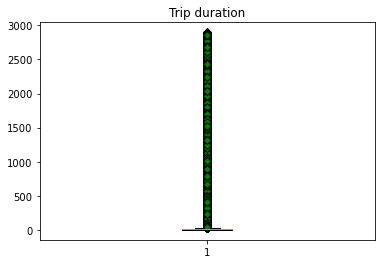

In [14]:
# df_sub2 trip_duration outliers

green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Trip duration')
ax3.boxplot(df_sub2.trip_duration, flierprops=green_diamond)

In [20]:
# Count the start stations

df_ssd = df_sub2.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

df_ssd['start_station_latitude'] = df_sub2[['start_station_name', 'start_station_latitude']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_latitude']

df_ssd['start_station_longitude'] = df_sub2[['start_station_name', 'start_station_longitude']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_longitude']



In [40]:
# Count the start stations

df_ssd = df_sub2.groupby(['start_station_name', 'start_station_latitude', 'start_station_longitude'], sort=False, as_index=False).agg(count=('start_station_name', 'count'))

In [61]:
df_ssd

,start_station_name,start_station_latitude,start_station_longitude,count,formal_en
0,W 82 St & Central Park West,40.78275,-73.97137,16328,United States of America
1,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,954,United States of America
2,York St & Jay St,40.7014851,-73.98656928,6738,United States of America
3,W 43 St & 6 Ave,40.75527307,-73.98316936,25973,United States of America
4,W 43 St & 10 Ave,40.76009437,-73.99461843,29671,United States of America
...,...,...,...,...,...
1209,5 Ave & E 103 St,40.791,-73.953,1,United States of America
1210,W 100 St & Broadway,40.797,-73.971,1,United States of America
1211,Fairview Ave & Linden St,40.70694,-73.90632,1,United States of America
1212,Wyckoff St & Nevins St,40.683426,-73.984275,6,United States of America


In [60]:
df_ssd = pd.DataFrame(df_ssd)
df_ssd["formal_en"] = 'United States of America'

In [42]:
# Count the end stations

df_esd = df_sub2.groupby(['end_station_name', 'end_station_latitude', 'end_station_longitude'], sort=False, as_index=False).agg(count=('end_station_name', 'count'))

In [64]:
df_esd

,end_station_name,end_station_latitude,end_station_longitude,count,formal_en
0,Central Park West & W 72 St,40.77579376683666,-73.9762057363987,35334,United States of America
1,3 Ave & E 71 St,40.76873687,-73.96119945,7169,United States of America
2,Carlton Ave & Flushing Ave,40.697787,-73.973736,9264,United States of America
3,E 95 St & 3 Ave,40.7849032,-73.950503,2485,United States of America
4,8 Ave & W 16 St,40.740983,-74.001702,9757,United States of America
...,...,...,...,...,...
1228,W 100 St & Broadway,40.797,-73.971,1,United States of America
1229,Frederick Douglass Blvd & W 115 St,40.803,-73.956,1,United States of America
1230,Wyckoff St & Nevins St,40.683426,-73.984275,14,United States of America
1231,Fairview Ave & Linden St,40.70694,-73.90632,1,United States of America


In [63]:
df_esd = pd.DataFrame(df_esd)
df_esd["formal_en"] = 'United States of America'

In [65]:
start_station_map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = geo_d, 
    data = df_ssd,
    columns = ['start_station_name', 'count'],
    key_on = 'feature.properties.formal_en',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Start station popularity").add_to(map)
folium.LayerControl().add_to(map)

In [66]:
map

In [26]:
folium.Map?

In [27]:
folium.Map()

In [51]:
# Start station map
map_start_stations = folium.Map(location=[38, -98], zoom_start=4)
df_ssd.apply(lambda row: folium.Marker(location=[row['start_station_latitude'], row['start_station_longitude']],
                                         popup=row['start_station_name']).add_to(map_start_stations), axis=1)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map_start_stations)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_start_stations)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_start_stations)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_start_stations)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_start_stations)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_start_stations)

# add layer control to show different maps
folium.LayerControl().add_to(map_start_stations)

In [52]:
map_start_stations

In [53]:
# end station map
map_end_stations = folium.Map(location=[38, -98], zoom_start=4)
df_esd.apply(lambda row: folium.Marker(location=[row['end_station_latitude'], row['end_station_longitude']],
                                         popup=row['end_station_name']).add_to(map_end_stations), axis=1)

# add tiles to map
folium.raster_layers.TileLayer('Open Street Map').add_to(map_end_stations)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_end_stations)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_end_stations)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_end_stations)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_end_stations)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_end_stations)

# add layer control to show different maps
folium.LayerControl().add_to(map_end_stations)

In [54]:
map_end_stations